In [1]:
#依赖包导入cell，请执行此cell导入相关依赖包
from sklearn.cluster import KMeans,DBSCAN
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def look_dif(WindNumber=2,Base_path='baseline.csv',C_path='submission_WN1_change_1009.csv'):
    df = pd.read_csv("dataset.csv")
    df1 = pd.read_csv(Base_path)
    df = df[df['WindNumber']==WindNumber ]
    df1 = df1[df1['WindNumber']==WindNumber ]
    df = df.sort_values(by="Time")
    df1 = df1.sort_values(by="Time")
    df['label']=list(df1['label'])
    d0 = df[df['label']==0]
    d1 = df[df['label']==1]
    print("Baseline","正确",len(d0),"错误",len(d1),len(d0)+len(d1))

    #对比的
    df2 = pd.read_csv(C_path)
    df2 = df2[df2['WindNumber']==WindNumber ]
    df['label']= df2['label']
    d0_2 = df[df['label']==0]
    d1_2 = df[df['label']==1]
    print("Noweline","正确",len(d0_2),"错误",len(d1_2),len(d0_2)+len(d1_2))
    


    fig, ax = plt.subplots(2, 2,figsize = (8, 8))
    ax[0][0].set_title("Baseline")
    ax[0][0].scatter(d1['WindSpeed'],d1['Power'],c='#FF00F5',s=1)
    ax[0][0].scatter(d0['WindSpeed'],d0['Power'],c='#4682B4',s=1)
    ax[1][0].scatter(d0['WindSpeed'],d0['Power'],c='#4682B4',s=1)
    ax[1][0].scatter(d1['WindSpeed'],d1['Power'],c='#FF00F5',s=1)

    ax[0][1].set_title("Now")
    ax[0][1].scatter(d1_2['WindSpeed'],d1_2['Power'],c='#FF00F5',s=1)
    ax[0][1].scatter(d0_2['WindSpeed'],d0_2['Power'],c='#4682B4',s=1)
    ax[1][1].scatter(d0_2['WindSpeed'],d0_2['Power'],c='#4682B4',s=1)
    ax[1][1].scatter(d1_2['WindSpeed'],d1_2['Power'],c='#FF00F5',s=1)
    plt.show()

Baseline 正确 21947 错误 24774 46721
Noweline 正确 18580 错误 28141 46721


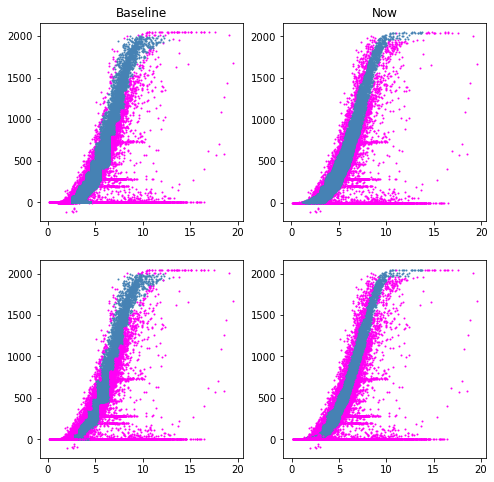

In [15]:
look_dif(12,'submission2.csv','submission_ALL_change_1017_F24681012_2.csv')

In [23]:
#数据替换与保存
d0 = d0.append(d1)
df1 = pd.read_csv("submission_0.90_WindNumber1,3_extend.csv")
df1 = df1.drop(d0.index)
df1 = df1.append(d0)
df1 = df1[['WindNumber','Time','label']]
df1 = df1.sort_index()

df1.to_csv("submission_WN3_WN1_bigger.csv",index=None)

c:\users\24320\envs\env_protection\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,
